In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CompleteDataset.csv')
df.head()

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primero hay que filtrar las columnas con información relevante.

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

-Unnamed es el índice de los datos lo cual es información redundante.

-Foto, Bandera, Logo del Club, Valor, Salario y puntajes en posiciones específicas es información innecesaria para el presente estudio.

-Vamos a "deshacernos" de esas columnas. 

In [4]:
cols = ['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
        'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

df = df[cols]

Por "buena" práctica vamos a cambiar las columnas a sólo minúsculas.

In [5]:
df.columns = df.columns.str.lower()

# ¿Cuál es la edad promedio de un futbolista profesional?

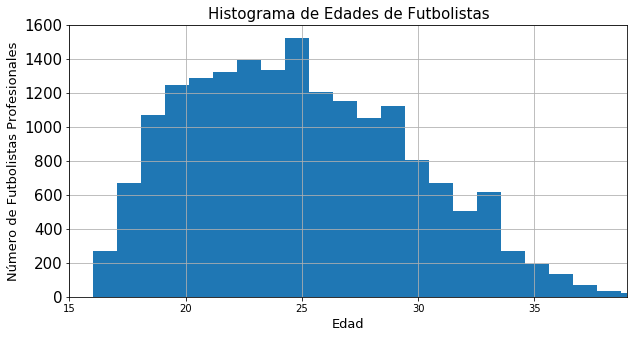

La edad promedio de un futbolista profesional es: 25
Con una desviación estandar de: 4.6


In [6]:
plt.figure(figsize=(10,5))
df.age.hist(bins=30)
plt.xlabel('Edad', fontsize = 13)
plt.ylabel('Número de Futbolistas Profesionales',fontsize = 13)
plt.title('Histograma de Edades de Futbolistas', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(15, df.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional es: %1.0f' % df.age.mean())
print('Con una desviación estandar de: %1.1f' % df.age.std())

Algunas medidas de tendencia central de la edad de los futbolistas profesionales son:

In [7]:
round(df.age.describe(),0)

count    17981.0
mean        25.0
std          5.0
min         16.0
25%         21.0
50%         25.0
75%         28.0
max         47.0
Name: age, dtype: float64

## Distribución de Edades de los Porteros

Se tiene la creencia general de que los porteros se retiran a mayor edad que los jugadores de campo. De ser esto cierto, la distribución de edades mostradas anteriormente debería ser diferente si sólo consideramos el dataset de los porteros.

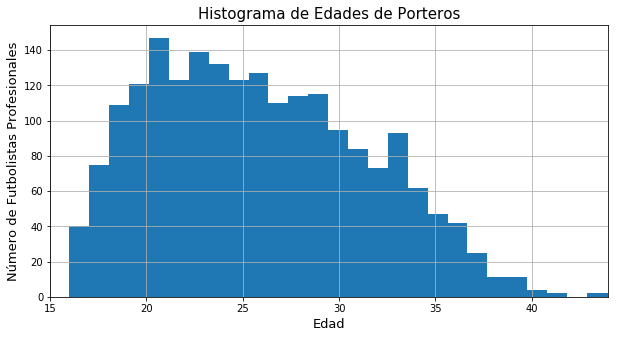

La edad promedio de un futbolista profesional que juega de portero es: 26
Con una desviación estandar de: 5.4


In [8]:
df_GK = df[df['preferred positions'] == 'GK ']

plt.figure(figsize=(10,5))
df_GK.age.hist(bins=30)
plt.xlabel('Edad', fontsize = 13)
plt.ylabel('Número de Futbolistas Profesionales',fontsize = 13)
plt.title('Histograma de Edades de Porteros', fontsize = 15)
plt.xlim(15, df_GK.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional que juega de portero es: %1.0f' % df_GK.age.mean())
print('Con una desviación estandar de: %1.1f' % df_GK.age.std())

Las medidas de tendencia central para las edades de porteros son:

In [9]:
round(df_GK.age.describe(),0)

count    2029.0
mean       26.0
std         5.0
min        16.0
25%        22.0
50%        26.0
75%        30.0
max        47.0
Name: age, dtype: float64

### Distribución de los Jugadores que No Son Porteros

Ya que hemos aislado a la población de porteros, veamos si la población aislada de jugadores de campo tiene un comportamiento diferente.

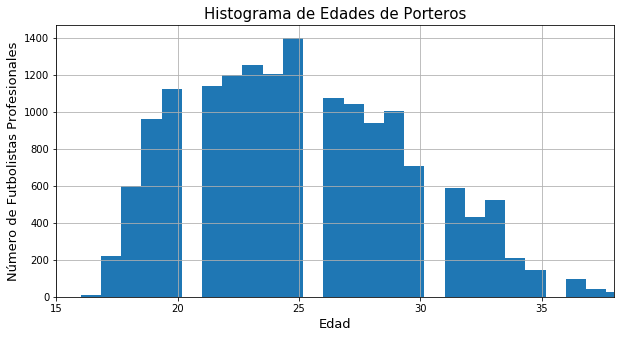

La edad promedio de un futbolista profesional de campo es: 25
Con una desviación estandar de: 4.5


In [10]:
df_FP = df[df['preferred positions'] != 'GK ']

plt.figure(figsize=(10,5))
df_FP.age.hist(bins=30)
plt.xlabel('Edad', fontsize = 13)
plt.ylabel('Número de Futbolistas Profesionales',fontsize = 13)
plt.title('Histograma de Edades de Porteros', fontsize = 15)
plt.xlim(15, df_FP.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional de campo es: %1.0f' % df_FP.age.mean())
print('Con una desviación estandar de: %1.1f' % df_FP.age.std())

In [11]:
round(df_FP.age.describe(),0)

count    15952.0
mean        25.0
std          4.0
min         16.0
25%         21.0
50%         25.0
75%         28.0
max         41.0
Name: age, dtype: float64

Observamos que el promedio y la desviación estándar para la muestra de porteros y jugadores son prácticamente iguales, también las demás medidas de tendencia central difieren a lo mucho por uno o dos años por lo que la creencia popular de que los porteros tienden a jugar por mucho más tiempo, salvo algunos casos excepcionales que no alteran el comportamiento general de la población, es falsa. 

# ¿Cuál es el país que más futbolistas profesionales genera?

Text(0.5,1,'Professional Players generated per country')

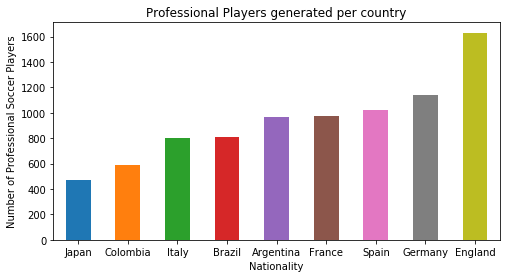

In [12]:
plt.figure(figsize=(8,4))
df.groupby('nationality').count().name.sort_values().tail(9).plot.bar(rot=0)
plt.xlabel('Nationality')
plt.ylabel('Number of Professional Soccer Players')
plt.title('Professional Players generated per country')

Inglaterra es el país del que más salen futbolistas profesionales, seguido de Alemania, España, Francia y Argenitina.

### ¿Qué país tiene más futbolistas profesionales de alto nivel?

Como el DataFrame está ordenado de mayor a menor overall bastará con tomar los primeros 40 datos y analizarlos.

Text(0.5,1,'Top Players per Country')

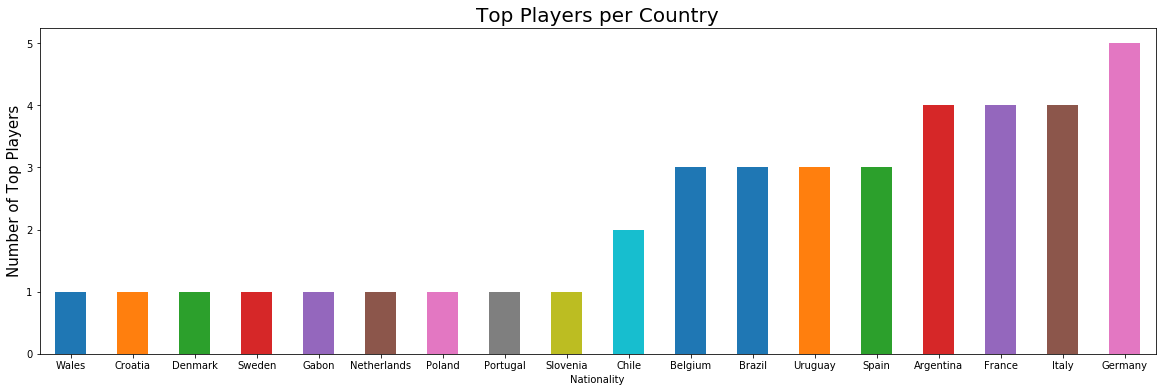

In [13]:
plt.figure(figsize=(20,6))
df.head(40).groupby('nationality').count().name.sort_values().plot.bar(rot=0)
plt.xlabel('Nationality')
plt.ylabel('Number of Top Players',fontsize= 15)
plt.title('Top Players per Country', fontsize = 20)

Así, a pesar de que Inglaterra produce un sinfín de futbolistas profesionales, ninguno de ellos logran estar en el top 40 de mejores jugadores del mundo, resultando en un equipo nacional mediano incapaz de ganar torneos internacionales.

# ¿Qué clubes tienen los mejores jugadores del mundo?

Text(0.5,1,'Top Players per Club')

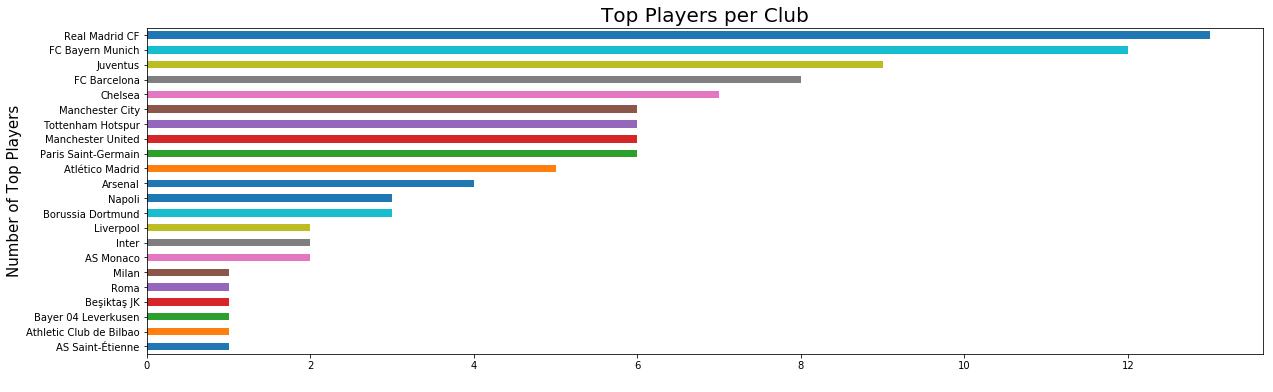

In [14]:
plt.figure(figsize=(20,6))
df.head(100).groupby('club').count().name.sort_values().plot.barh()
plt.xlabel(' ')
plt.ylabel('Number of Top Players',fontsize= 15)
plt.title('Top Players per Club', fontsize = 20)

Los clubes con más jugadores top 100 en el mundo son el Real Mandril, el Bayern Munich, la Juventus y el Farsa, equipos que en los últimos años han protagonizado casi todas las finales de la UEFA champions League.  

# Relación entre variables numéricas

Primero sólo tomemos en cuenta las columnas con datos numéricos, es decir, quitamos la columna de nombre.

In [15]:
cols_num = ['age', 'overall', 'potential', 'special', 'acceleration',
         'aggression', 'agility', 'balance', 'ball control', 'composure',
         'crossing', 'curve', 'dribbling','finishing', 'free kick accuracy',
         'gk diving', 'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes', 
         'heading accuracy','interceptions', 'jumping', 'long passing', 'long shots',
         'marking','penalties', 'positioning', 'reactions', 'short passing', 'shot power',
         'sliding tackle', 'sprint speed', 'stamina', 'standing tackle', 'strength', 
         'vision', 'volleys']

In [16]:
df_num =df[cols_num]
df_num.head()

,age,overall,potential,special,acceleration,aggression,agility,balance,ball control,composure,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
0,32,94,94,2228,89,63,89,63,93,95,...,96,83,94,23,91,92,31,80,85,88
1,30,93,93,2154,92,48,90,95,95,96,...,95,88,85,26,87,73,28,59,90,85
2,25,92,94,2100,94,56,96,82,95,92,...,88,81,80,33,90,78,24,53,80,83
3,30,92,92,2291,88,78,86,60,91,83,...,93,83,87,38,77,89,45,80,84,88
4,31,92,92,1493,58,29,52,35,48,70,...,85,55,25,11,61,44,10,83,70,11


In [17]:
df_num.columns


Index(['age', 'overall', 'potential', 'special', 'acceleration', 'aggression',
       'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve',
       'dribbling', 'finishing', 'free kick accuracy', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes',
       'heading accuracy', 'interceptions', 'jumping', 'long passing',
       'long shots', 'marking', 'penalties', 'positioning', 'reactions',
       'short passing', 'shot power', 'sliding tackle', 'sprint speed',
       'stamina', 'standing tackle', 'strength', 'vision', 'volleys'],
      dtype='object')

In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 38 columns):
age                   17981 non-null int64
overall               17981 non-null int64
potential             17981 non-null int64
special               17981 non-null int64
acceleration          17981 non-null object
aggression            17981 non-null object
agility               17981 non-null object
balance               17981 non-null object
ball control          17981 non-null object
composure             17981 non-null object
crossing              17981 non-null object
curve                 17981 non-null object
dribbling             17981 non-null object
finishing             17981 non-null object
free kick accuracy    17981 non-null object
gk diving             17981 non-null object
gk handling           17981 non-null object
gk kicking            17981 non-null object
gk positioning        17981 non-null object
gk reflexes           17981 non-null object
heading accurac

Notamos que casi todas las variables numéricas son object en lugar de float o integer. Hay que transformar las variables para hacer el análisis numérico. 

In [19]:
df_num = df_num.astype('float')

ValueError: could not convert string to float: '15+8'

El dataframe tiene datos del estilo 15+8, hay que modificar el dataset

In [20]:
for i in cols_num:
    print(df_num[i].unique())

[32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47]
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46]
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 46]
[2228 2154 2100 ... 1226  736  874]
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '70+9' '56' '26' '80+1' '35' '36' '32' '49-1' '41'
 '67+2' '37' '28' '33' '20' '79-2' '65-2' '29' '91-2' '74-3' '75+1' '41-6'
 '74+1' '70+3' '17' '75+5' '74+2' '71+2' '68+1' '71+4' '89-2' '25' '27'
 '24' '58-10' '78+1' '86+1' '66-1' '22' '66+1' '15' '74+4' '71-3' '80+2'


In [21]:
for i in cols_num:
    df[i] = df[i].astype(str).str[:2]
    print(df[i].unique())

['32' '30' '25' '31' '28' '26' '27' '29' '39' '23' '24' '35' '33' '34'
 '36' '21' '22' '18' '20' '19' '37' '38' '40' '17' '44' '41' '16' '43'
 '47']
['94' '93' '92' '91' '90' '89' '88' '87' '86' '85' '84' '83' '82' '81'
 '80' '79' '78' '77' '76' '75' '74' '73' '72' '71' '70' '69' '68' '67'
 '66' '65' '64' '63' '62' '61' '60' '59' '58' '57' '56' '55' '54' '53'
 '52' '51' '50' '49' '48' '47' '46']
['94' '93' '92' '91' '90' '89' '88' '87' '86' '85' '84' '83' '82' '81'
 '80' '79' '78' '77' '76' '75' '74' '73' '72' '71' '70' '69' '68' '67'
 '66' '65' '64' '63' '62' '61' '60' '59' '58' '57' '56' '55' '54' '53'
 '52' '51' '50' '49' '48' '46']
['22' '21' '14' '20' '19' '12' '18' '13' '16' '17' '11' '15' '10' '98'
 '92' '97' '91' '96' '99' '95' '94' '89' '90' '93' '88' '86' '87' '85'
 '84' '82' '83' '80' '78' '81' '76' '79' '77' '75' '72' '73']
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55'

In [22]:
df[cols_num] = df[cols_num].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 42 columns):
name                   17981 non-null object
age                    17981 non-null float64
nationality            17981 non-null object
overall                17981 non-null float64
potential              17981 non-null float64
club                   17733 non-null object
special                17981 non-null float64
acceleration           17981 non-null float64
aggression             17981 non-null float64
agility                17981 non-null float64
balance                17981 non-null float64
ball control           17981 non-null float64
composure              17981 non-null float64
crossing               17981 non-null float64
curve                  17981 non-null float64
dribbling              17981 non-null float64
finishing              17981 non-null float64
free kick accuracy     17981 non-null float64
gk diving              17981 non-null float64
gk handling         

Ya que todos los datos numéricos son del tipo float64 podemos empezar el análisis.

In [23]:
df_num = df[cols_num]
df_num.head()

,age,overall,potential,special,acceleration,aggression,agility,balance,ball control,composure,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
0,32.0,94.0,94.0,22.0,89.0,63.0,89.0,63.0,93.0,95.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,30.0,93.0,93.0,21.0,92.0,48.0,90.0,95.0,95.0,96.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,25.0,92.0,94.0,21.0,94.0,56.0,96.0,82.0,95.0,92.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,30.0,92.0,92.0,22.0,88.0,78.0,86.0,60.0,91.0,83.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,31.0,92.0,92.0,14.0,58.0,29.0,52.0,35.0,48.0,70.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


Veamos los coeficientes de correlación entre las variables numéricas del dataset.

Generamos un mapa de calor de todas las variables numéricas con la librería seaborn.

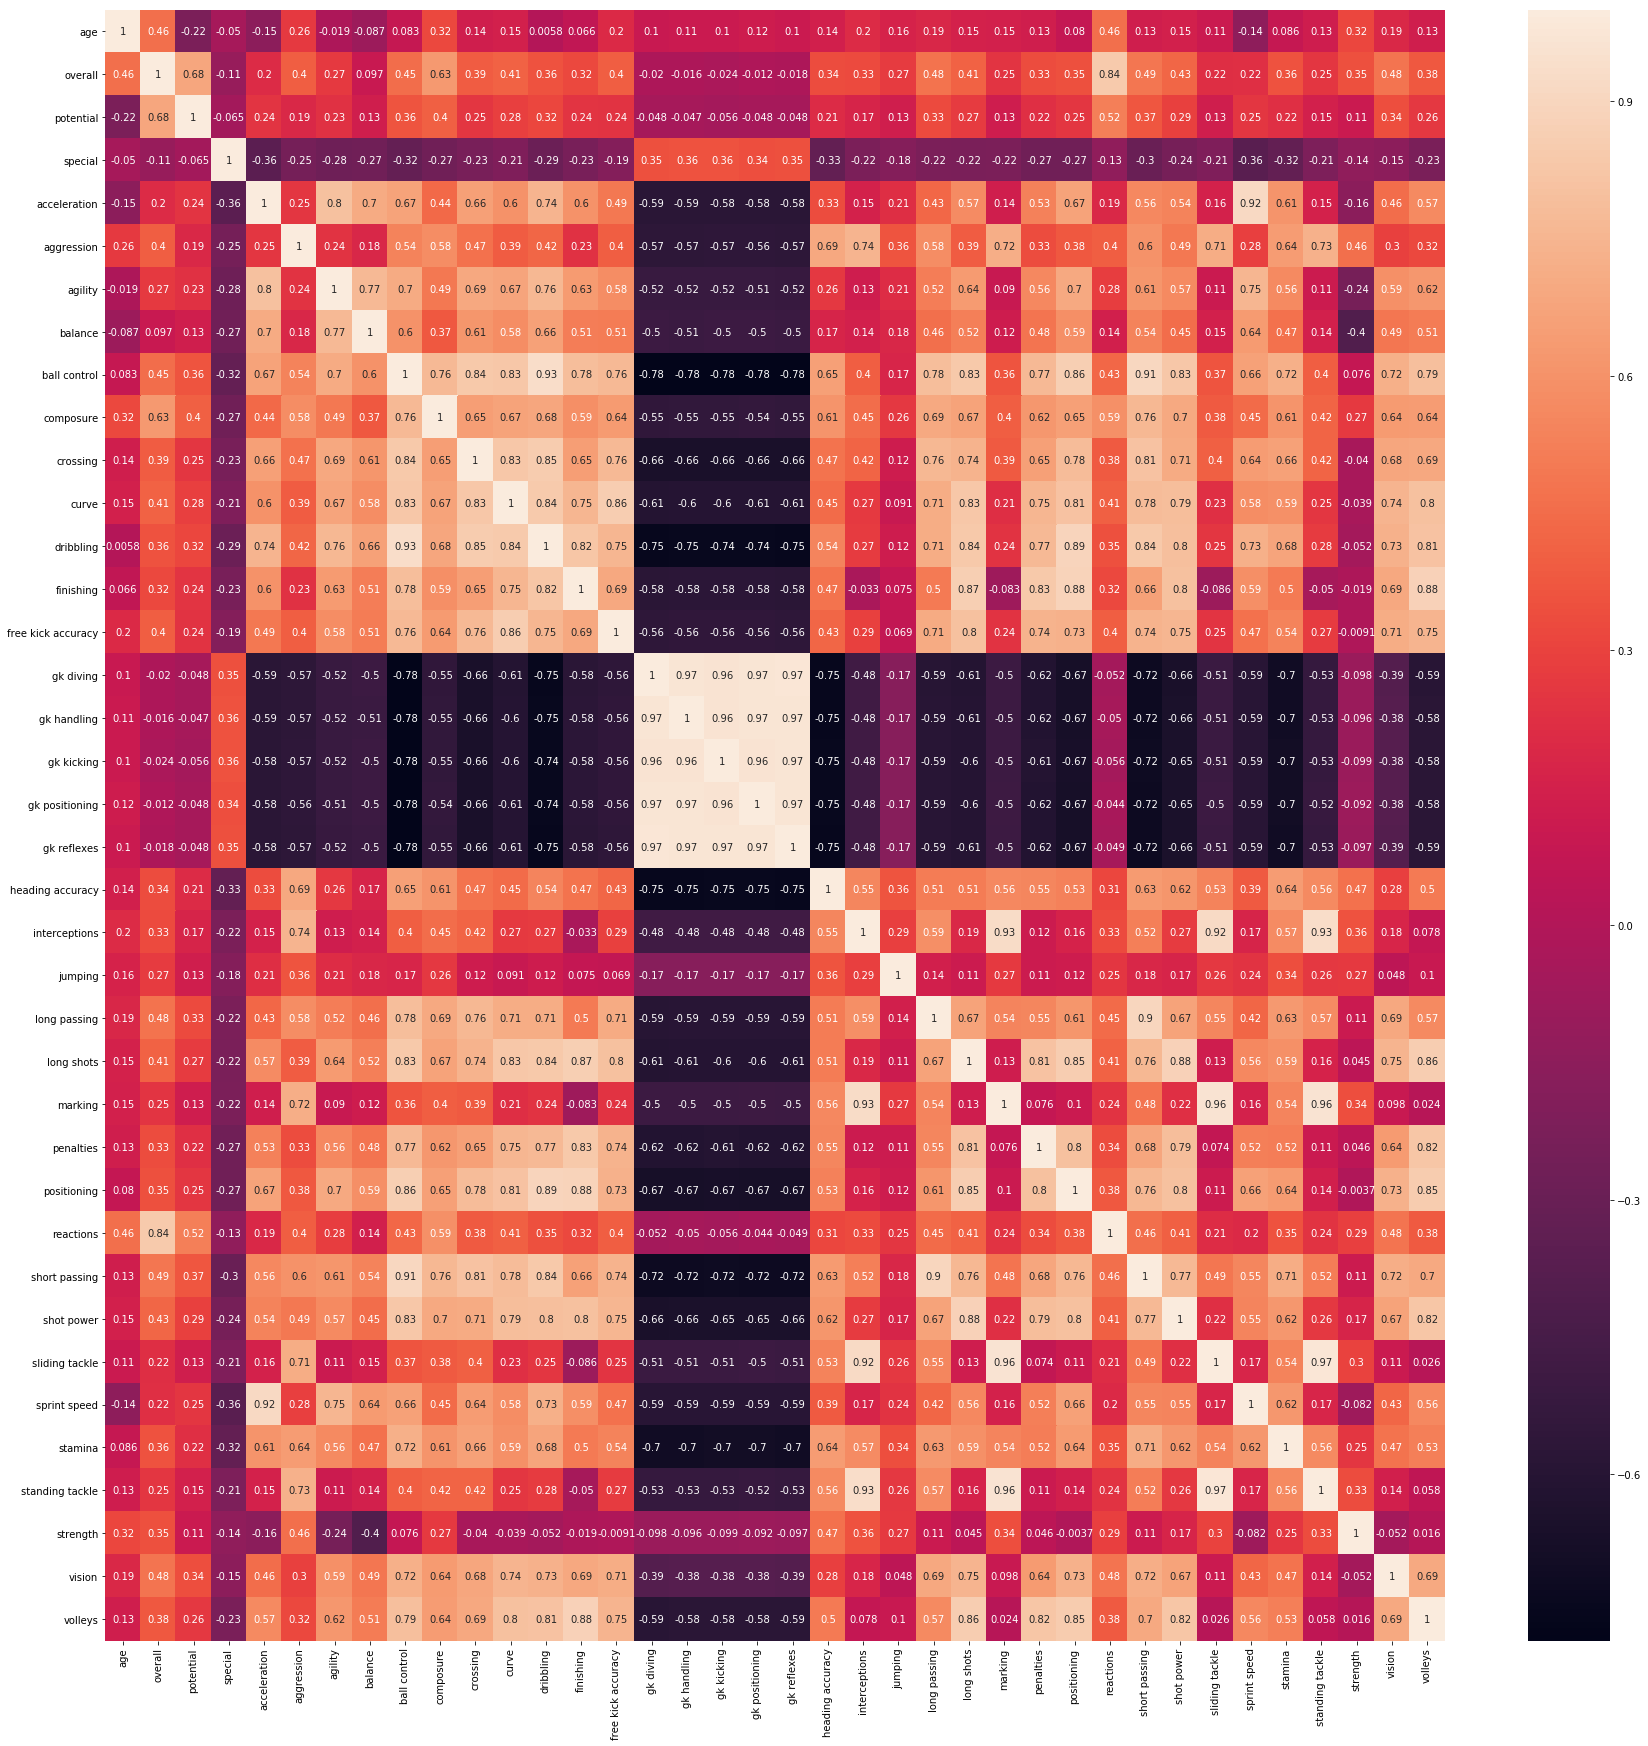

In [24]:
import seaborn as sbn

plt.figure(figsize=(30,30))
sbn.heatmap(df_num.corr(), annot = True)

Dado que nuestra variable objetivo es overall, veamos específicamente los coeficientes de correlación con las demás variables numéricas.

In [25]:
df.corrwith(df.overall).sort_values(ascending = False).head(10)
#Agarrar negativas.


overall          1.000000
reactions        0.840578
potential        0.683474
composure        0.629755
short passing    0.488375
vision           0.481185
long passing     0.475162
age              0.459765
ball control     0.452109
shot power       0.427811
dtype: float64

La variable numérica más correlacionada con overall es reacciones, grafiquemos esta variable contra overall para comprobarlo.

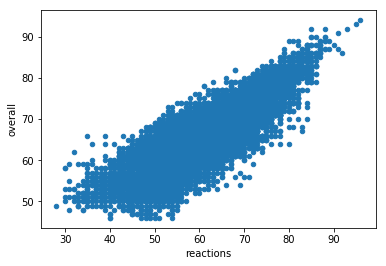

In [26]:
df[['overall','reactions']].plot.scatter(x='reactions',y='overall')

Se observa más o menos una relación lineal por lo que el coeficiente de correlación no nos engaña.

# Observaciones 

-No tengo ni idea de qué sea eso de special.

-Todas las habilidades de portero, excepto reacción, están correlacionadas negativamente con las demás habilidades. Esto podría deberse a que, en general, los porteros tienden a no tener habilidades de juego como sus compañeros de equipo (por eso son porteros).

-La variable más correlacionada con overall es reacciones, esto puede deberse a que este atributo suma puntos tanto a porteros como a jugadores de campo.




# Regresión Lineal

Ahora haremos una regresión lineal con las skills de cada jugador eligiendo como variable objetivo el overall.

Primero tomaremos en cuenta todos los datos que se escogerán de manera aleatoria, después consideraremos sólo los datos de los porteros y, por último, sólo con los jugadores de campo.

In [27]:
from sklearn.model_selection import train_test_split

# Tomando todos los datos

Definimos X como las variables que se utilizarán para predecir la variable objetivo y y separamos en conjuntos de entrenamiento y prueba.

In [28]:
X_ = ['age', 'potential', 'special', 'acceleration', 'aggression',
       'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve',
       'dribbling', 'finishing', 'free kick accuracy', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes',
       'heading accuracy', 'interceptions', 'jumping', 'long passing',
       'long shots', 'marking', 'penalties', 'positioning', 'reactions',
       'short passing', 'shot power', 'sliding tackle', 'sprint speed',
       'stamina', 'standing tackle', 'strength', 'vision', 'volleys']

X = df_num[X_]
y = df_num.overall

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Aplicando el modelo de regresión lineal múltiple con la librería sklearn:

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Importamos métricas de sklearn para evaluar el rendimiento del modelo y también calculamos la distribución de residuos del modelo.

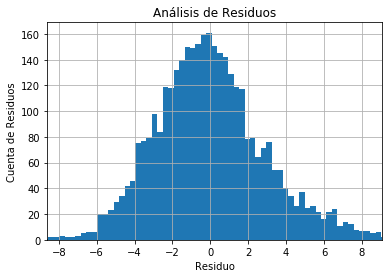

Residuos en promedio son: 0.1 por ciento
R^2: 0.92
Mean Squared Error: 1.94


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

res = (y_pred-y_test)/y_test * 100
res.hist(bins = 100)
plt.xlabel('Residuo')
plt.ylabel('Cuenta de Residuos')
plt.title('Análisis de Residuos')
plt.xlim(res.quantile(0.005) - 2, res.quantile(0.99))
plt.show()
print('Residuos en promedio son: %1.1f' % res.mean()+ ' por ciento')
print('R^2: %1.2f' %r2_score(y_test,y_pred))
print('Mean Squared Error: %1.2f' % np.sqrt(mean_squared_error(y_pred,y_test)))

Ahora veamos los valores de los coeficientes correspondientes a cada variable calculados por el algoritmo:

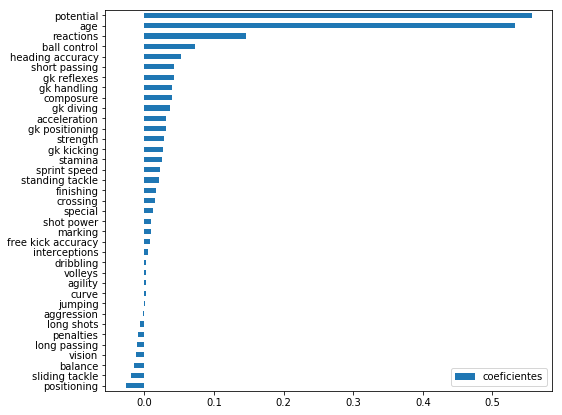

In [31]:
coef = regressor.coef_
coefs = pd.DataFrame(index = X_train.columns, data = coef, columns = ['coeficientes'])
coefs = coefs.sort_values(by= 'coeficientes')
coefs.plot.barh(figsize=(8,7))

Las skills que suman más puntos al overall son potencial, edad, reacciones y control de balón lo cual es consistente con los coeficientes de correlación lineal.

Ahora algunos ejemplos aislados

In [32]:
Cristy = df[df['name'] == 'Cristiano Ronaldo']
print('Predicted Overall of CR7 is: %2.0f' %regressor.predict(Cristy[X_]))
print('Real Overall value of CR7 is: %2.0f' %Cristy.overall)

Predicted Overall of CR7 is: 96
Real Overall value of CR7 is: 94


In [33]:
Hirving = df[df['name'] == 'H. Lozano']
print('Predicted Overall of Chuckie is: %2.0f' %regressor.predict(Hirving[X_]))
print('Real Overall value of Chuckie is: %2.0f' %Hirving.overall)

Predicted Overall of Chuckie is: 77
Real Overall value of Chuckie is: 78


In [34]:
Courtois = df[df['name'] == 'T. Courtois']
print('Predicted Overall of Courtois is: %2.0f' %regressor.predict(Courtois[X_]))
print('Real Overall value of Courtois: %2.0f' %Courtois.overall)

Predicted Overall of Courtois is: 85
Real Overall value of Courtois: 89


In [35]:
Ochoa = df[df['name'] == 'G. Ochoa']
print('Predicted Overall of 8a is: %2.0f' %regressor.predict(Ochoa[X_]))
print('Real Overall value of 8a: %2.0f' %Ochoa.overall)

Predicted Overall of 8a is: 78
Real Overall value of 8a: 79


# Aislando a los porteros

El modelo anterior peca de no darle peso suficiente a los coeficientes correspondientes a las habilidades de portero diferentes a reacción, lo cual nos sugiere que el dartaset de porteros deben ser tratado de forma aislada.

Aislando a los porteros y repitiendo el análisis anterior:

In [36]:
df_GK = df[df['preferred positions'] == 'GK '] 
df_GK.shape

(2029, 42)

Notemos que el dataset es muchísimo más pequeño que antes.

Dividiendo en conjunto de entrenamiento y prueba:

In [37]:
X_GK = df_GK[X_]
y_GK = df_GK.overall

X_trainGK, X_testGK, y_trainGK, y_testGK = train_test_split(X_GK, y_GK, test_size = 0.20, random_state= 0)

regressorGK = LinearRegression()
regressorGK.fit(X_trainGK, y_trainGK)
y_predGK = regressorGK.predict(X_testGK)

Haciendo el análisis de residuo y evaluando el rendimiento del algoritmo:

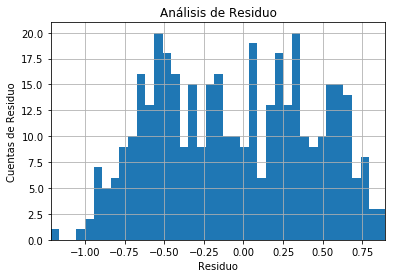

Error cuadrático medio es: 0.3
R2 es: 1.00
El valor promedio de los residuos es: -0.06 por ciento


In [38]:
res_GK = (y_predGK-y_testGK)/y_testGK *100
res_GK.hist(bins=50)
plt.xlabel('Residuo')
plt.ylabel('Cuentas de Residuo')
plt.title('Análisis de Residuo')
plt.xlim(res_GK.quantile(0.005), res_GK.quantile(0.99))
plt.show()
print('Error cuadrático medio es: %1.1f' % np.sqrt(mean_squared_error(y_predGK, y_testGK)))
print('R2 es: %1.2f' % r2_score(y_predGK, y_testGK))
print('El valor promedio de los residuos es: %1.2f' %res_GK.mean() + ' por ciento')

Notemos que todos los parámetros "mejoraron" al analizar a los porteros por separado. El error cuadrático medio bajó de 4 a 0.3 y la R2 subió de 0.92 a 0.99

In [39]:
df_GK.corrwith(df_GK.overall).sort_values(ascending = False).head(10)

overall           1.000000
gk reflexes       0.930197
gk diving         0.928093
gk positioning    0.927667
gk handling       0.910020
reactions         0.854899
gk kicking        0.751285
potential         0.720505
age               0.504090
composure         0.441282
dtype: float64

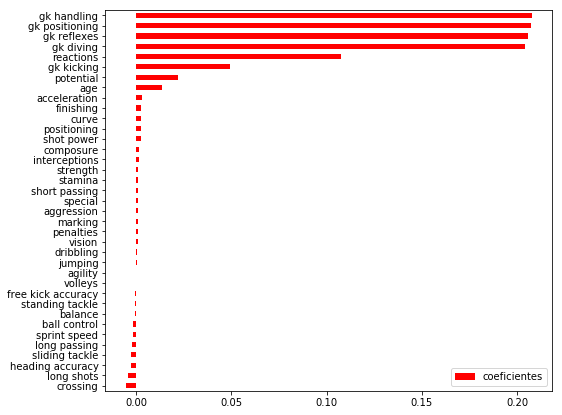

In [40]:
coef = regressorGK.coef_
coefs = pd.DataFrame(index = X_train.columns, data= coef, columns = ['coeficientes'])
coefs = coefs.sort_values(by = 'coeficientes', ascending = True)
coefs.plot.barh(color = 'red', figsize = (8,7))

Observamos que en este caso el modelo le ha dado más peso a los atributos propiamente de porteros antes que a las habilidades esenciales de juego lo cual hace sentido dado que sólo estamos evaluando porteros.

Algunos ejemplos aislados:

In [41]:
Courtois = df[df['name'] == 'T. Courtois']
print('Predicted Overall of Courtois is: %2.0f' %regressorGK.predict(Courtois[X_]))
print('Real Overall value of Courtois: %2.0f' %Courtois.overall)

Predicted Overall of Courtois is: 87
Real Overall value of Courtois: 89


In [42]:
Ochoa = df[df['name'] == 'G. Ochoa']
print('Predicted Overall of 8a is: %2.0f' %regressorGK.predict(Ochoa[X_]))
print('Real Overall value of 8a: %2.0f' %Ochoa.overall)

Predicted Overall of 8a is: 78
Real Overall value of 8a: 79


Ha mejorado la predicción de Cortois y la de Ochoa se ha mantenido.

# Aislando Jugadores de Campo

Repetimos el mismo proceso que antes, pero ahora excluyendo a los porteros.

In [43]:
# FP stands for Field Player
df_FP = df[df['preferred positions'] != 'GK '] 

Dado que no estamos evaluando porteros, debemos eliminar los skills de porteros del data set.

In [44]:
X_F = ['age', 'potential', 'special', 'acceleration', 'aggression',
       'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve',
       'dribbling', 'finishing', 'heading accuracy', 'interceptions', 'jumping', 'long passing',
       'long shots', 'marking', 'penalties', 'positioning', 'reactions',
       'short passing', 'shot power', 'sliding tackle', 'sprint speed',
       'stamina', 'standing tackle', 'strength', 'vision', 'volleys']

Haciendo el split entre entrenamiento y prueba y aplicando la regresión multilineal:

In [45]:
X_FP = df_FP[X_F]
y_FP = df_FP.overall

X_trainFP, X_testFP, y_trainFP, y_testFP = train_test_split(X_FP, y_FP, test_size = 0.20, random_state= 0)

regressorFP = LinearRegression()
regressorFP.fit(X_trainFP, y_trainFP)
y_predFP = regressorFP.predict(X_testFP)

Haciendo análisis de residuo y evaluando el rendimiento del modelo:

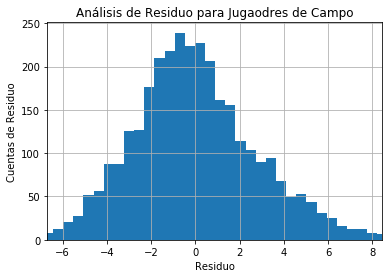

Error cuadrático medio es: 1.87
R2 es: 0.92
El valor promedio de los residuos es: 0.04 por ciento


In [46]:
res_FP = (y_predFP-y_testFP)/y_testFP *100
res_FP.hist(bins=50)
plt.xlabel('Residuo')
plt.ylabel('Cuentas de Residuo')
plt.title('Análisis de Residuo para Jugaodres de Campo')
plt.xlim(res_FP.quantile(0.005), res_FP.quantile(0.99))
plt.show()
print('Error cuadrático medio es: %1.2f' % np.sqrt(mean_squared_error(y_predFP, y_testFP)))
print('R2 es: %1.2f' % r2_score(y_predFP, y_testFP))
print('El valor promedio de los residuos es: %1.2f' %res_FP.mean() + ' por ciento')

Los parámetro no mejoran significativamente al aislar a los jugadores de campo respecto a cuando se tomó el dataset sin excluir datos.

Veamos el comportamiento de los coeficientes arrojados por el algoritmo:

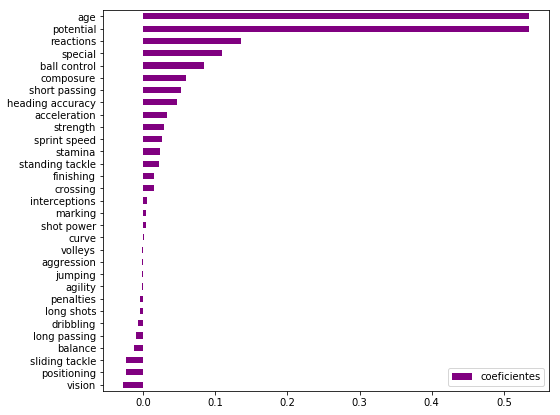

In [47]:
coefFP = regressorFP.coef_
coefsFP = pd.DataFrame(index = X_trainFP.columns, data= coefFP, columns = ['coeficientes'])
coefsFP = coefsFP.sort_values(by = 'coeficientes',ascending= True)
coefsFP.plot.barh(color = 'purple', figsize = (8,7))

En este caso el modelo ha mantenido el orden de relevancia de los mismos coeficientes que cuando analizamos tanto a porteros como a jugadores, esto podría deberse a que hay más jugadores de campo que porteros en el data set y estos últimos no influyen mucho en los parámetros que termina escogiendo el modelo.

Algunos ejemplos aislados:

In [48]:
Cristy = df[df['name'] == 'Cristiano Ronaldo']
print('Predicted Overall of CR7 is: %2.0f' %regressorFP.predict(Cristy[X_F]))
print('Real Overall value of CR7 is: %2.0f' %Cristy.overall)

Predicted Overall of CR7 is: 96
Real Overall value of CR7 is: 94


In [49]:
Chuckie = df[df['name'] == 'H. Lozano']
print('Predicted Overall of Chuckie is: %2.0f' %regressorFP.predict(Chuckie[X_F]))
print('Real Overall value of CR7 is: %2.0f' %Chuckie.overall)

Predicted Overall of Chuckie is: 77
Real Overall value of CR7 is: 78


En términos generales, el modelo no mejora ni empeora al aislar a los porteros.

# Conclusiones 

La regresión multilineal resulta adecuada para predecir el overall de los datos proporcionados por la FIFA. El rendimiento del modelo mejora para predecir el overall de porteros cuando se tratan los datos aislando a los porteros, pero no sucede lo mismo para el dataset con sólo jugadores de campo. Para mejorar el modelo es posible que deba de segmentarse aún más el dataset, a saber: evaluar defensas, mediocampistas, extremos y centro delanteros por separado, esto implicaría un poco más de trabajo dado que hay varios jugadores que en el apartado de Preferred Positions presentan dos o más posiciones.